<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/05_01_LAB_Iris_28_%E7%8E%8B%E9%9F%8B%E5%8D%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 05-01.LAB_Iris_學號_姓名  (例: "05-01.LAB_Iris_00_陳仁政")
* 附件檔名請設定為： 05-01.LAB_Iris_學號_姓名.ipynb (例: "05-01.LAB_Iris_00_陳仁政.ipynb")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


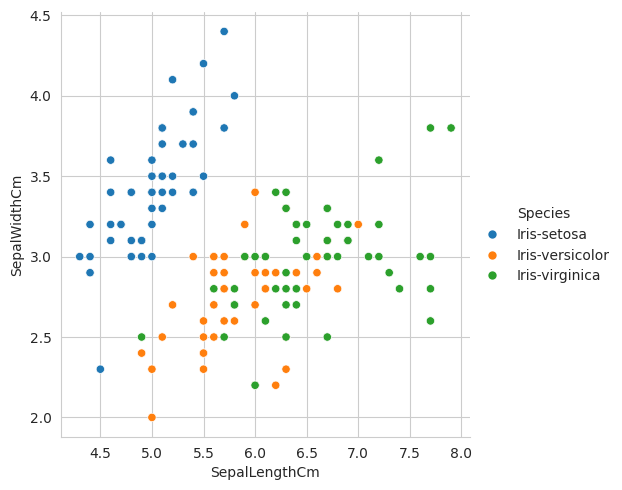

In [ ]:
# 根據 SepalLengthCm 與 SepalWidthCm 兩個欄位來畫出 三種不同種類花的資料點分布圖
sns.relplot(x = data['SepalLengthCm'] ,y = data['SepalWidthCm'], hue = data['Species'] ,kind = 'scatter')

### ↑ 問題：從上圖可以看出什麼關係？

ans: iris-setosa與其他兩品種有明顯區分

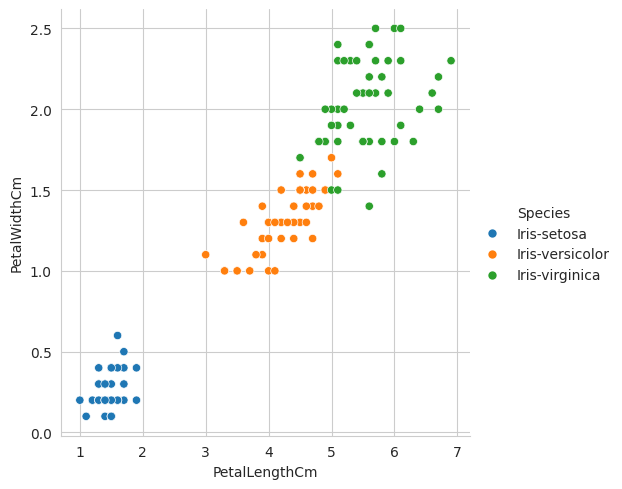

In [4]:
sns.relplot(x = data['PetalLengthCm'] ,y = data['PetalWidthCm'], hue = data['Species'] )

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

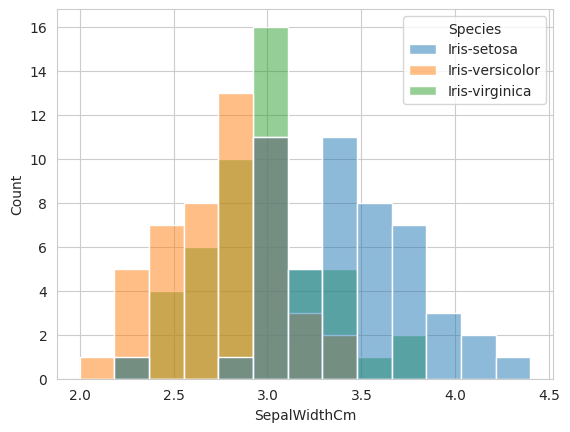

In [ ]:
# 畫出 SepalWidthCm 的直方圖，並分成三類
sns.histplot(x = data['SepalWidthCm'],hue = data['Species'])

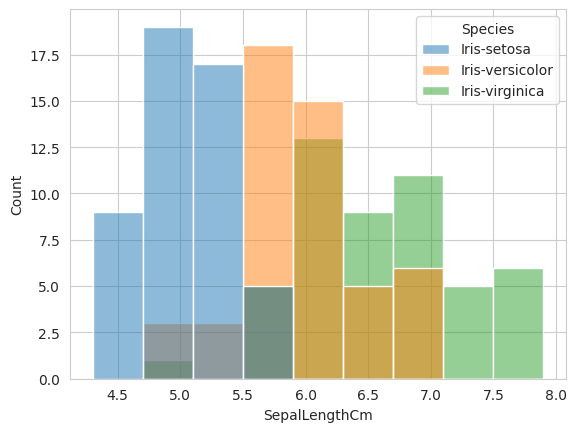

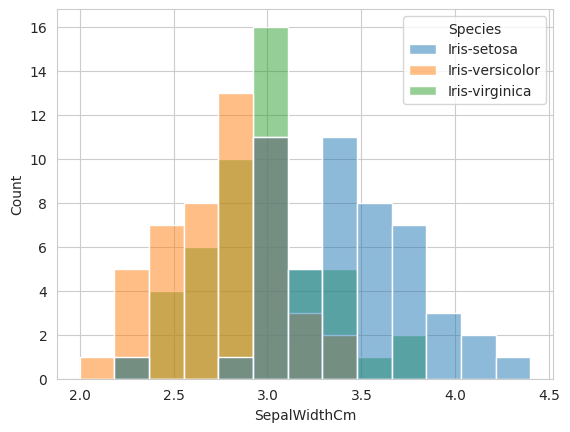

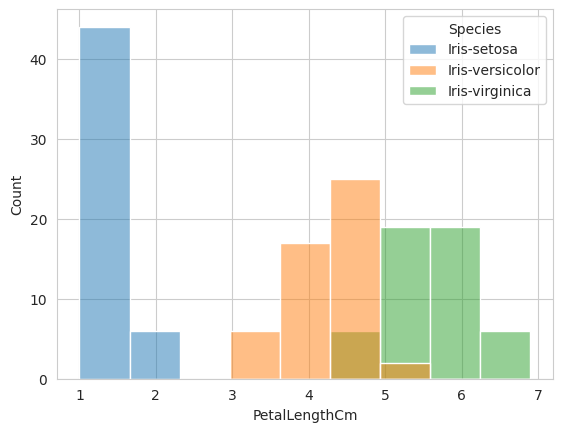

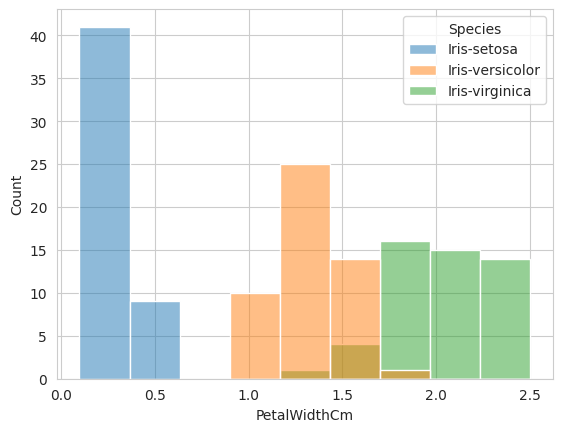

In [ ]:
# 練習題
# 根據上圖看看其他三個欄位的直方圖分布
# 並說明那些欄位比較容易進行分類
sns.histplot(x = data['SepalLengthCm'],hue = data['Species'])
plt.show()
sns.histplot(x = data['SepalWidthCm'],hue = data['Species'])
plt.show()
sns.histplot(x = data['PetalLengthCm'],hue = data['Species'])
plt.show()
sns.histplot(x = data['PetalWidthCm'],hue = data['Species'])
plt.show()
# ans: PetalWidthCm,因為重疊的數量最少

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

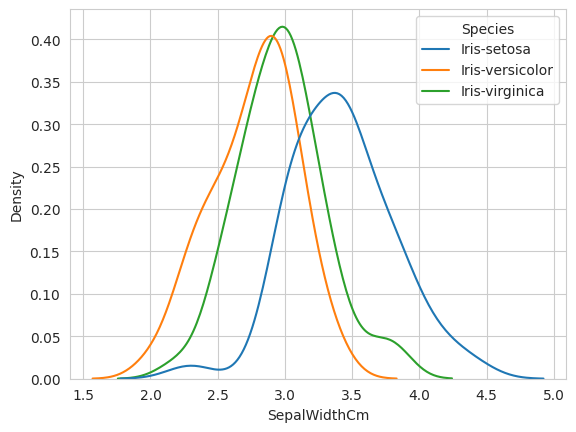

In [ ]:
# 畫出 SepalWidthCm 的KDE圖，並分成三類
sns.kdeplot(data=data, x='SepalWidthCm', hue='Species')

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

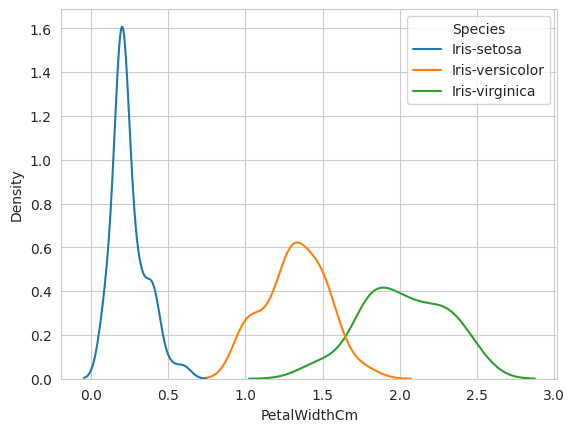

In [10]:
sns.kdeplot(data=data, x='PetalWidthCm', hue='Species')

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

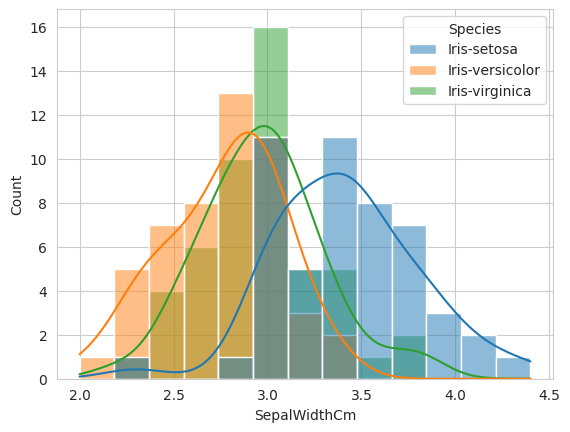

In [ ]:
# 同時顯示直方圖與KDE圖
sns.histplot(data=data, x = 'SepalWidthCm',hue = 'Species', kde=True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

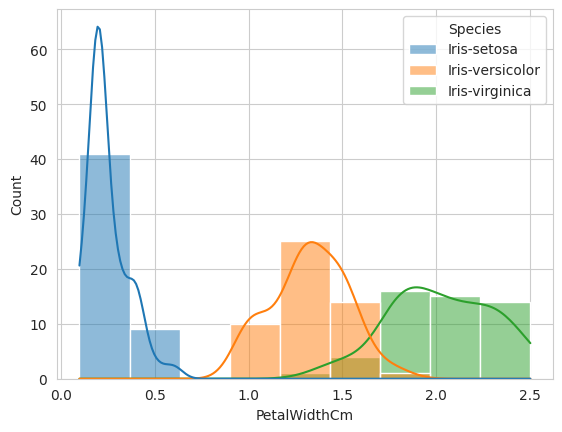

In [12]:
sns.histplot(data=data, x='PetalWidthCm', hue='Species', kde = True)

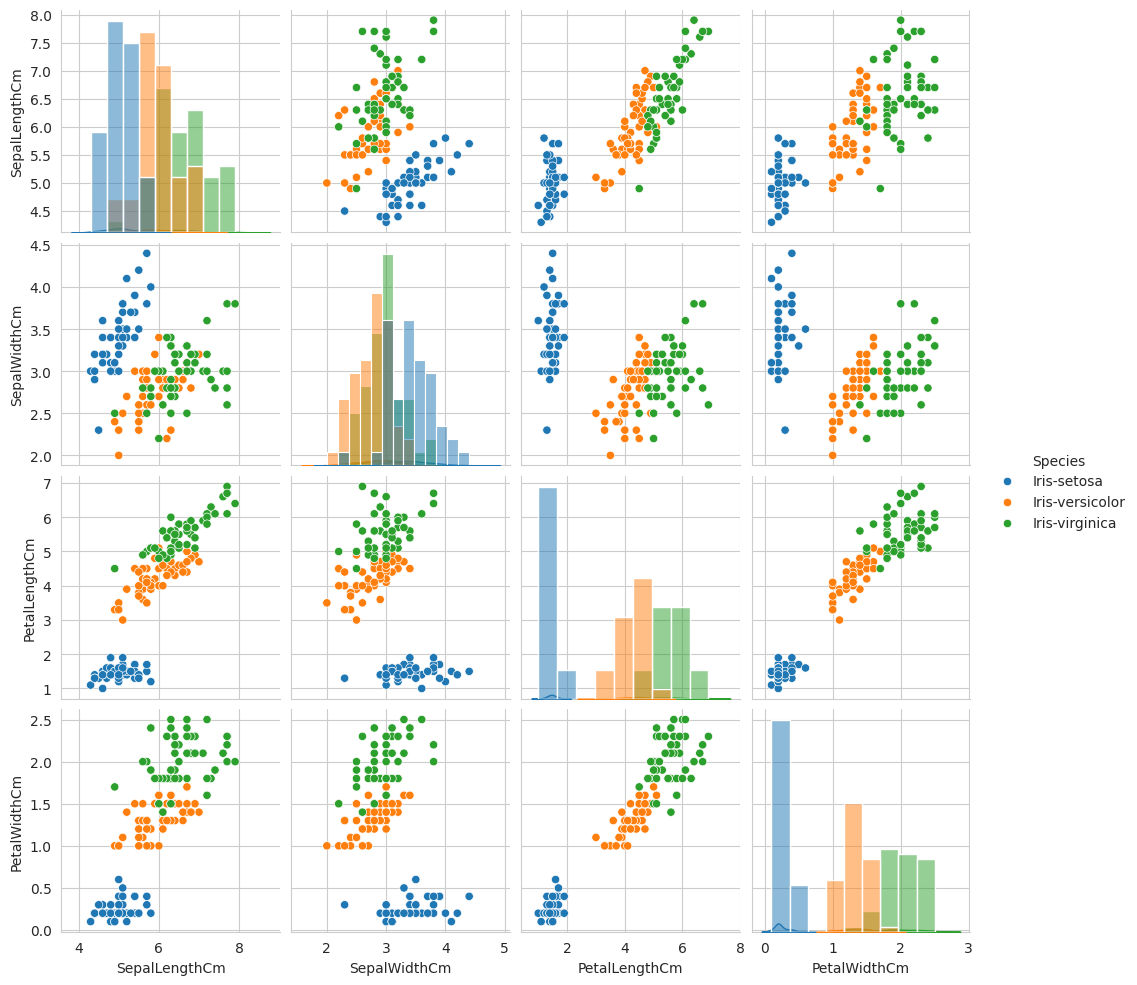

In [17]:
# 使用 Pairplot來畫出散布圖矩陣
# sns.pairplot(data, hue = 'Species')
pairplot = sns.pairplot(data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue = 'Species')
pairplot.map_diag(sns.histplot)

### ↑ 問題：從上圖可以看出什麼關係？

用PetalWidthCm(最好) 與 PetalLengthCm 區分三品種的能力更好
iris-setosa 與另外兩品種更易區分

In [19]:
#計算四個欄位的相關性係數矩陣
numerical_data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # Select only numerical columns
numerical_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

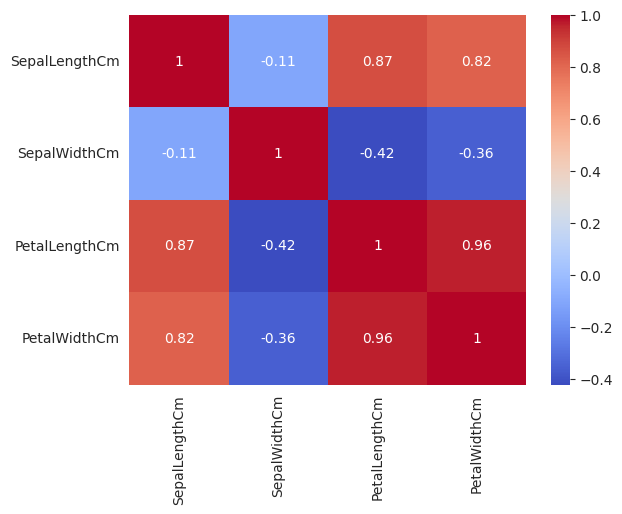

In [22]:
corrmatrix = numerical_data.corr()
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm')

### ↑ 問題：從上圖可以看出什麼關係？

In [21]:
data['is_setosa'] = (data['Species'] == 'Iris-setosa').astype('int64')

In [23]:
numerical_data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','is_setosa']] # Select only numerical columns
numerical_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_setosa
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510
is_setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000
